## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6


In [4]:
type(df[['sales']])

pandas.core.frame.DataFrame


#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

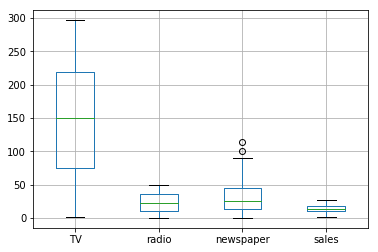

In [5]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

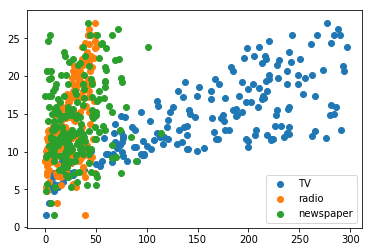

In [6]:
plt.scatter(df['TV'],df['sales'],label='TV')
plt.scatter(df['radio'],df['sales'],label='radio')
plt.scatter(df['newspaper'],df['sales'],label='newspaper')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1073bc208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a15e0e198>]], dtype=object)

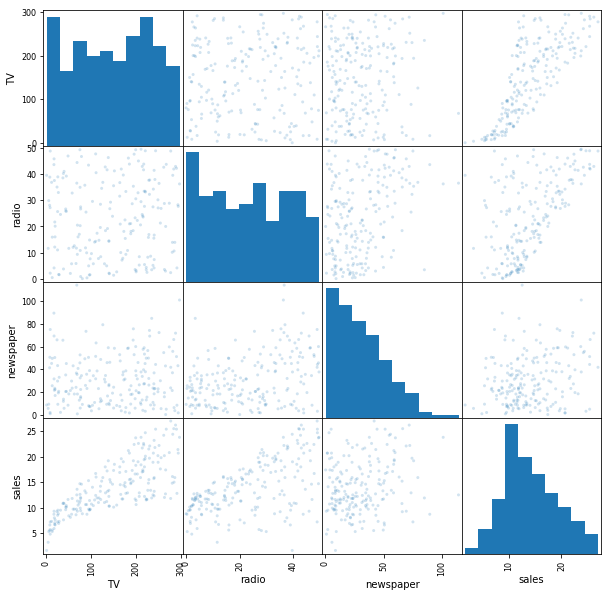

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10,10), diagonal='hist')

Which of the variables seem correlated with one another? Which don't? Explain your answer

There is a positive correlation between TV and sales, and between radio and sales, because there appears to be a positive linear trend in the sales vs. TV and sales vs. radio graphs (as TV/radio increase, sales increase). Newspaper and sales do not seem to be correlated because on the sales vs. newspaper graph, there is no apparent linear trend. Following the same reasoning, between TV, radio, and newspaper, there is no correlation.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [8]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [9]:
y = df['sales']

b) Set X to be just the features described above in df

In [10]:
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [11]:
size = len(df.index)
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

# Split the data into training/testing sets
y_train = train['sales']
y_test = test['sales']

# Split the targets into training/testing sets
X_train = train[['TV','radio','newspaper']]
X_test = test[['TV','radio','newspaper']]


d) Train model on training data, and make predictions on testing data

In [12]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# make predictions on testing data
predictions = regr.predict(X_test)
print(pd.DataFrame(predictions))

            0
0   12.148288
1   12.033232
2   18.381434
3   12.749804
4   18.091099
5   16.558883
6   14.870547
7   17.098556
8   21.570182
9    9.273757
10  20.341167
11  21.176625
12   8.361414
13  22.840616
14  18.926466
15   4.422657
16   9.653278
17  15.214376
18  16.743964
19  17.792928
20   6.036778
21  11.944261
22  22.083267
23   7.830078
24  15.702198
25  11.671578
26  19.501884
27   8.759004
28  18.442596
29  16.307368
30   5.171158
31  12.351916
32  14.190006
33  19.935688
34   6.510912
35  24.120768
36  20.659840
37   8.338933
38   5.303849
39  12.775449


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [13]:
# The mean square error
#print("Residual sum of squares: %.2f"
     # % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Variance score: 0.91


This is a good variance score because it means that 91% of the variance in our test data around the mean is explained by our linear model.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

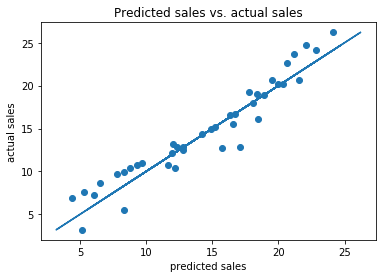

In [14]:
plt.scatter(predictions, y_test,label='actual')
plt.plot(y_test,y_test)
plt.xlabel("predicted sales")
plt.ylabel("actual sales")
plt.title("Predicted sales vs. actual sales")
plt.show()

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

We can compare the linear regression coefficients associated with each feature to determine their relative importance. Since the coefficients explain how the sales change with one unit of change in the given feature, in order to properly compare the effect a feature has on the sales we must make sure each feature has the same units. We can do this by normalizing the data before running the regression.

In [15]:
print('Order of features: TV, radio, newspaper')
print('Coefficients before normalizing: \n', regr.coef_)
print('Normalize and retrain: ')
df_norm = (df - df.mean()) / (df.max() - df.min())

size = len(df.index)
train_norm=df_norm.sample(frac=0.8,random_state=200)
test_norm=df_norm.drop(train.index)

# Split the data into training/testing sets
y_train_norm = train_norm['sales']
y_test_norm = test_norm['sales']

# Split the targets into training/testing sets
X_train_norm = train_norm[['TV','radio','newspaper']]
X_test_norm = test_norm[['TV','radio','newspaper']]

# Create linear regression object
regr_norm = LinearRegression()

# Train the model using the training sets
regr_norm.fit(X_train_norm, y_train_norm)

# make predictions on testing data
predictions = regr_norm.predict(X_test_norm)

# The coefficients
print('Coefficients after normalizing: \n', regr_norm.coef_)

Order of features: TV, radio, newspaper
Coefficients before normalizing: 
 [ 0.04642541  0.1838375   0.00023463]
Normalize and retrain: 
Coefficients after normalizing: 
 [ 0.54047218  0.35898976  0.00105029]


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

As observed by running the regression twice, first without normalizing the data, then after normalizing the data, for the purposes of feature selection and model interpretation it is extremely important to normalize the data before fitting the model. When fitting the model before normalizing the data, it appears as if radio is the most important feature, affecting sales by .18 units for every unit of change in radio, while apparently TV would only affeect sales by 0.046 units for every unit increase in TV, and for every unit increase in dollars spent on newspaper advertising sales would increase by 0.0002. However, when we normalize the dollars spent among TV, radio, and newspaper, we see that TV is actually much more important than radio, affecting sales by 0.54 units for every unit change in TV, while radio affects sales by 0.36 units for every unit change in dollars spent on radio. We can conclude that the apparent importance of radio over TV was due to the smaller unit size for radio in comparison to TV. Similarly, the coefficient of the newspaper feature after normalizing is approximately 0.001, which while small compared to TV and radio, is 5 times greater than the coefficient before normalizing, suggesting that failing to normalize before fitting the data diminishes the actual importance of the features by a great deal.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

//anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


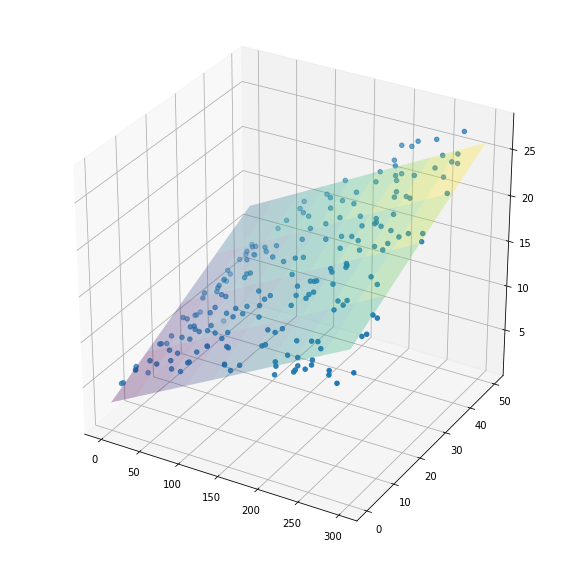

In [21]:
# 3d plotting source: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
from mpl_toolkits import mplot3d

size = len(df.index)

# Create linear regression object
regr_all = LinearRegression()

# Train the model using the training sets
regr_all.fit(df[['TV','radio']], df['sales'])

# generate x range, generate y range
x = np.linspace(0, 300, 10)
y = np.linspace(0, 50, 5)

# meshgrid explanation https://stackoverflow.com/questions/12864445/numpy-meshgrid-points
X, Y = np.meshgrid(x, y)
df_t = pd.DataFrame({'TV':X.ravel(),'radio':Y.ravel()})

# make predictions on new data points
Z = regr_all.predict(df_t[['TV','radio']])

fig = plt.figure(figsize=(10,10))
plt.title("")
ax = plt.axes(projection="3d")
ax.scatter3D(df['TV'], df['radio'], df['sales'])
ax.plot_surface(X, Y, Z.reshape(X.shape), rstride=1, cstride=1, alpha = 0.3, cmap='viridis')


//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


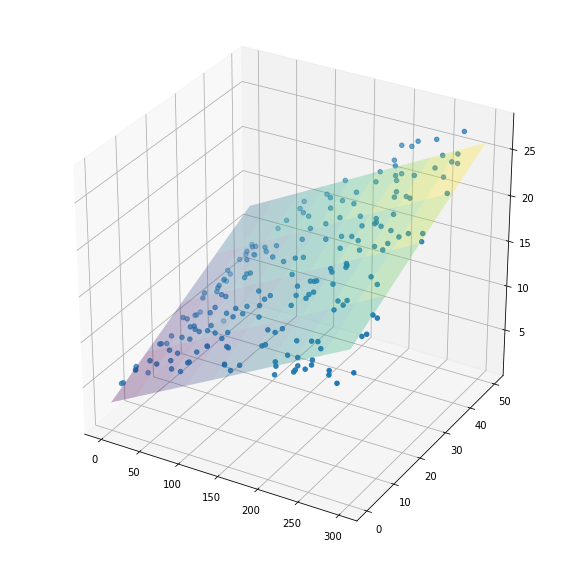

In [45]:
''' alternative method for graphing with respect to TV, sales '''
model = lambda tv, radio: regr_all.coef_[0] * tv + regr_all.coef_[1] * radio + regr_all.intercept_

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(df['TV'], df['radio'], df['sales'])

# generate x range, generate y range
x = np.linspace(0, 300, 10)
y = np.linspace(0, 50, 5)

X, Y = np.meshgrid(x, y)
df_t = pd.DataFrame({'TV':X.ravel(),'radio':Y.ravel()})
Z = model(df_t['TV'], df_t['radio'])
ax.plot_surface(X, Y, Z.reshape(X.shape), rstride=1, cstride=1, alpha = 0.3, cmap='viridis')

//anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


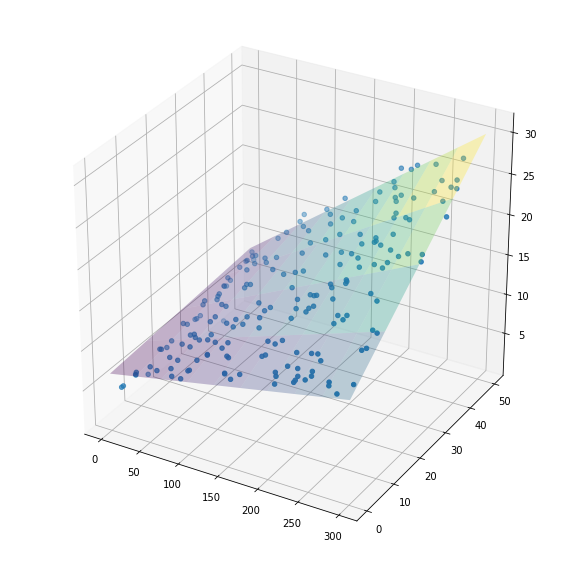

In [18]:
''' Trying nonlinear model with a TV-radio cross term'''
df['TV*radio'] = df['TV']*df['radio']

# Create linear regression object
regr_nonlinear = LinearRegression()

# Train the model using the training sets
regr_nonlinear.fit(df[['TV','radio','TV*radio']], df['sales'])

# generate x range, generate y range
x = np.linspace(0, 300, 10)
y = np.linspace(0, 50, 5)

# meshgrid explanation https://stackoverflow.com/questions/12864445/numpy-meshgrid-points
X, Y = np.meshgrid(x, y)
df_t = pd.DataFrame({'TV':X.ravel(),'radio':Y.ravel()})
df_t['TV*radio']=df_t['TV']*df_t['radio']

# make predictions on new data points
Z = regr_nonlinear.predict(df_t[['TV','radio','TV*radio']])

fig = plt.figure(figsize=(10,10))
plt.title("")
ax = plt.axes(projection="3d")
ax.scatter3D(df['TV'], df['radio'], df['sales'])
ax.plot_surface(X, Y, Z.reshape(X.shape), rstride=1, cstride=1, alpha = 0.3, cmap='viridis')


## Analysis: Adding Nonlinear Term

By adding a TV-radio cross term, our model appears to fit the data better than the linear regression on just TV and radio. We can see this from the right side of the 3-D plot, where with the linear model there were points above and below the predicted surface, whereas with the nonlinear model the surface fits those points.

14


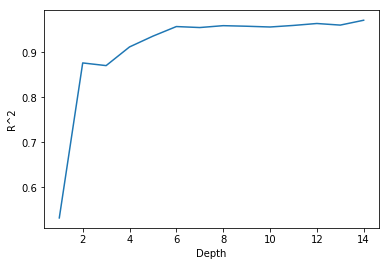

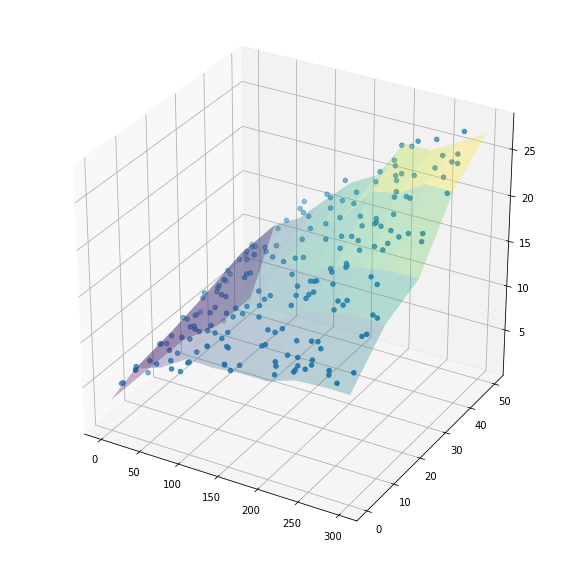

In [36]:
''' Attempting decision tree implementation '''
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
X_train, X_test, y_train, y_test = train_test_split(
    df[['TV','radio']], df['sales'], test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,15)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print (n_opt)

regr_opt = DecisionTreeRegressor(max_depth=n_opt)
regr_opt.fit(df[['TV','radio']], df['sales'])
# generate x range, generate y range
x = np.linspace(0, 300, 10)
y = np.linspace(0, 50, 5)

# meshgrid explanation https://stackoverflow.com/questions/12864445/numpy-meshgrid-points
X, Y = np.meshgrid(x, y)
df_t = pd.DataFrame({'TV':X.ravel(),'radio':Y.ravel()})

# make predictions on new data points
Z = regr_opt.predict(df_t[['TV','radio']])

fig = plt.figure(figsize=(10,10))
plt.title("")
ax2 = plt.axes(projection="3d", label='decisiontree')
ax2.scatter3D(df['TV'], df['radio'], df['sales'])
ax2.plot_surface(X, Y, Z.reshape(X.shape), rstride=1, cstride=1, alpha = 0.3, cmap='viridis')

###### Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


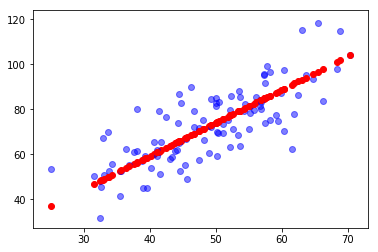

In [23]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate = 0.0001):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],alpha=0.5,color='b')
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


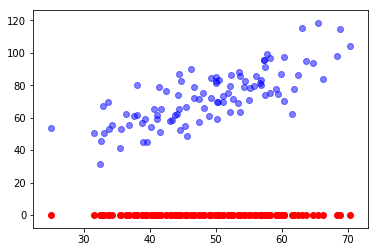

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.07273505055368648, m = 3.685351486795526, error = 12248.923658059466


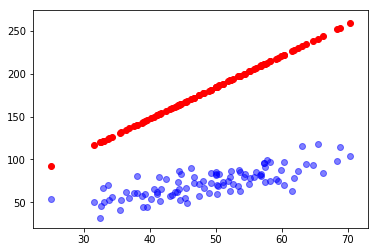

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.03503133043958161, m = -1.812925535576324, error = 27125.9989614646


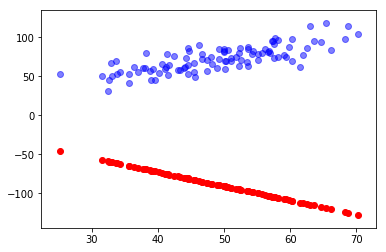

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.12649657885967047, m = 6.390068174869519, error = 60239.92274554496


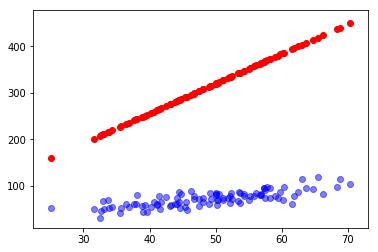

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.11374200683340807, m = -5.848185220212095, error = 133946.07277683076


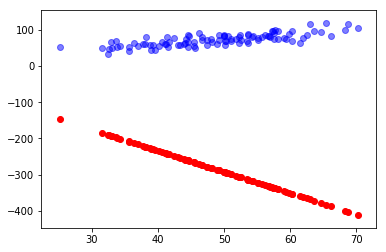

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.24542423466870028, m = 12.410337296692443, error = 298003.84433146904


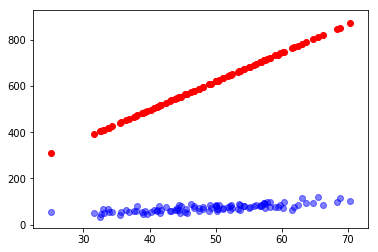

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.28967567003687617, m = -14.829995329449478, error = 663169.4699413386


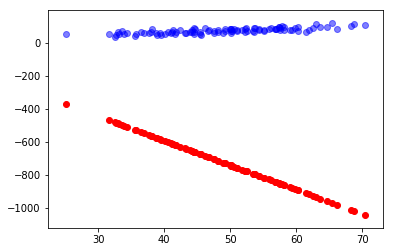

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.5094010313993653, m = 25.81048099761001, error = 1475968.1128761834


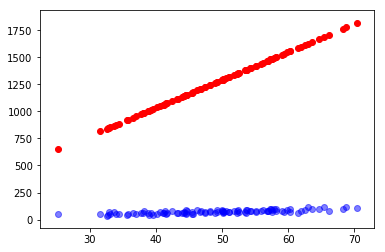

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.6820116610464277, m = -34.822013381765444, error = 3285124.253337868


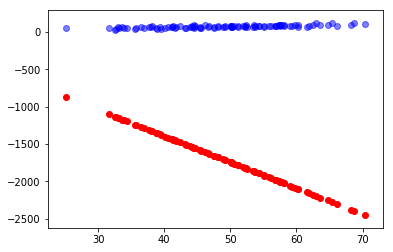

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.096233422691767, m = 55.6370121244165, error = 7312008.363935543


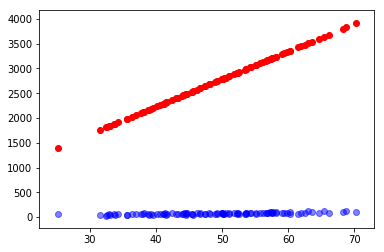

In [24]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num, learning_rate = 0.0005)
    plt.show()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


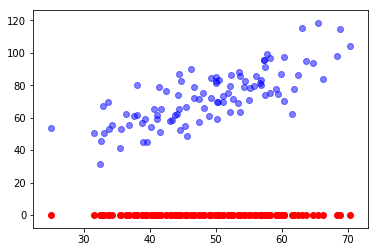

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


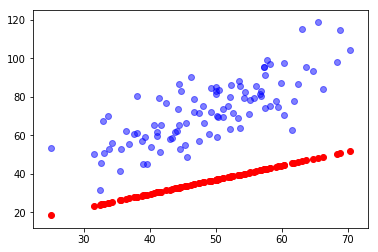

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


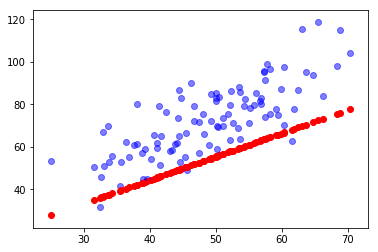

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


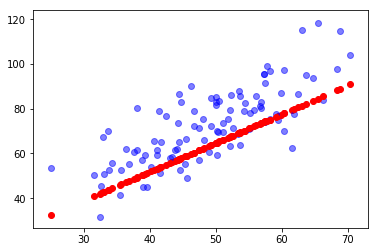

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


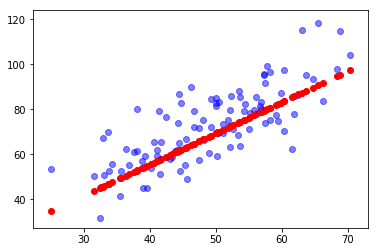

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


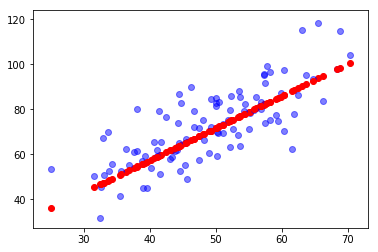

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


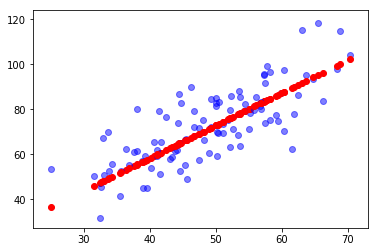

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


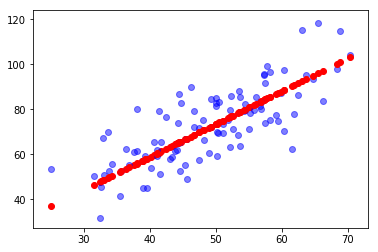

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


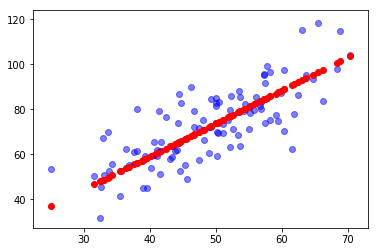

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


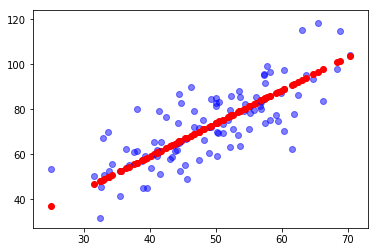

In [25]:
for num in range(0,10):
    run(num, learning_rate = 0.0001)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


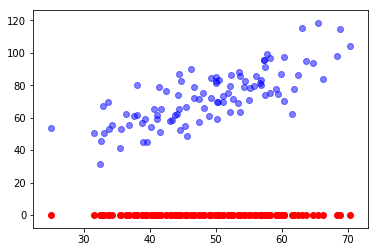

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.05818804044294919, m = 2.948281189436421, error = 5494.876051554403


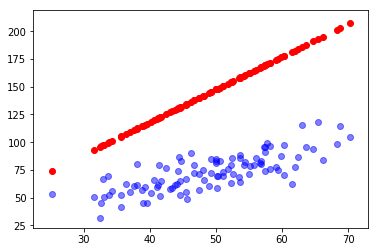

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0008551646958474546, m = 0.019040133005722826, error = 5425.548903532563


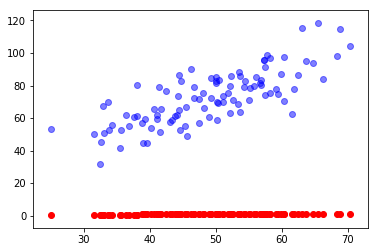

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.05829678234050579, m = 2.9293452426042537, error = 5357.114738058191


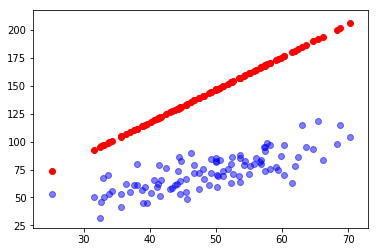

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.0017054776406117411, m = 0.0378348940251243, error = 5289.562052862701


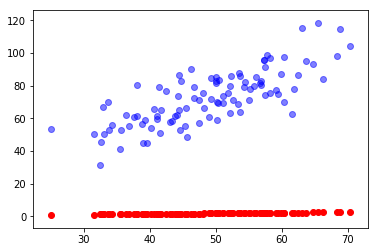

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.05841028677277326, m = 2.9106530834885644, error = 5222.879493835148


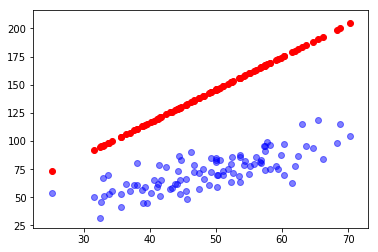

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0025510009562452057, m = 0.05638744363626502, error = 5157.055853113861


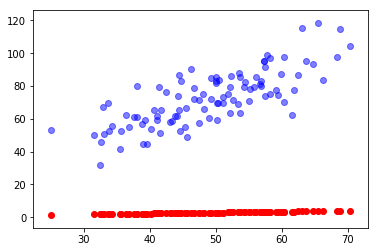

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.05852849202267843, m = 2.8922015719324805, error = 5092.080067202602


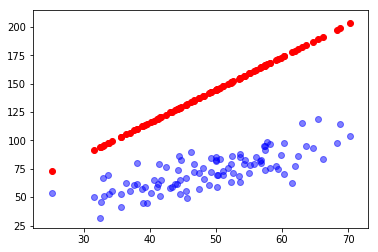

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.0033917959645461543, m = 0.0747009017066449, error = 5027.94121511106


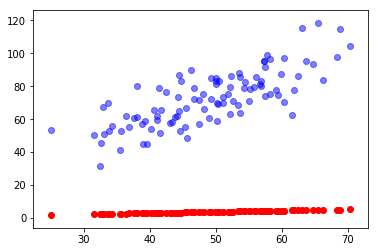

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.05865133716813143, m = 2.8739876082266385, error = 4964.628516519291


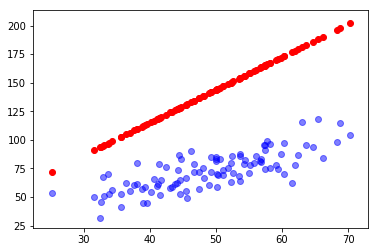

In [26]:
for num in range(0,10):
    run(num, learning_rate = 0.0004)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


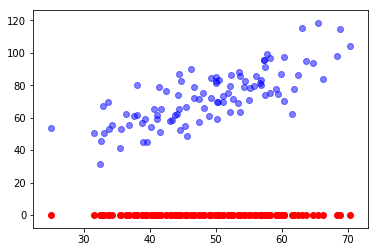

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


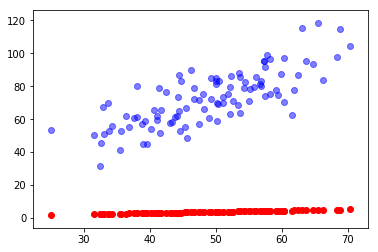

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


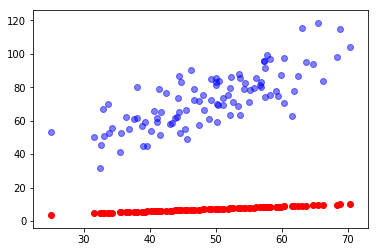

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


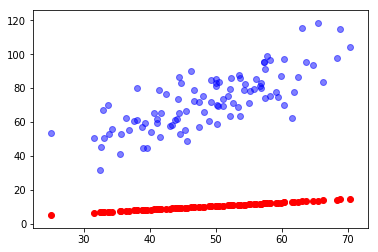

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


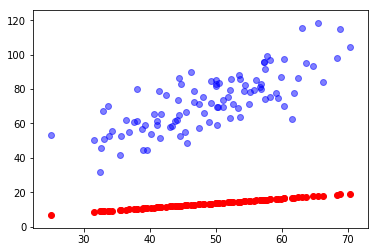

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


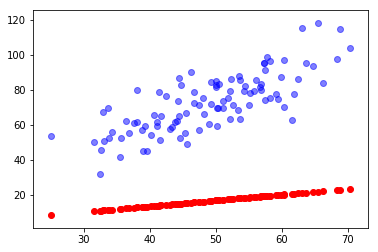

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


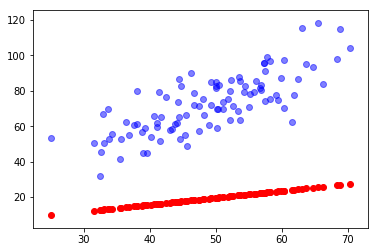

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


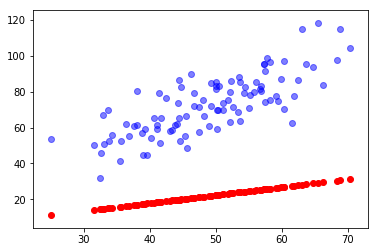

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


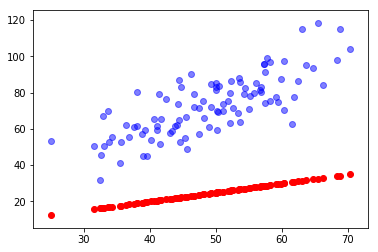

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


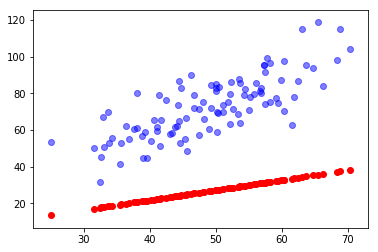

In [27]:
for num in range(0,10):
    run(num, learning_rate = 0.00001)
    plt.show()

In [32]:
def run_error(num_iterations, learning_rate=0.0001):
    points = genfromtxt("../data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
#     print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
#     print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    err = compute_error_for_line_given_points(b, m, points)
#     print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, err))
    return err

learning_rates_increasing = [0.0001, 0.0004, 0.0005]
learning_rates_decreasing = [0.0001, 0.00005, 0.00001]
def plot_error(learningrate, iterations = 100):
    iter_range = np.arange(1,iterations)
    errors = []
    for i in iter_range:
        errors.append(run_error(i, learning_rate=learningrate))
    
    plt.plot(iter_range, errors)
    plt.xlabel("iterations")
    plt.ylabel("error")
    plt.title("Error, Learning rate = {0}".format(learningrate))
    plt.show()
    

The below graph shows the gradient descent error at a fixed iteration while increasing learning rate from 0.0000001 to 0.0005. The iteration number 4 was chosen empirically by running gradient descent over 10 iterations (shown in the code blocks above) on learning rates [0.0005, 0.0004, 0.0001 , 0.00001]. For learning rate = 0.0001, gradient descent converges within 10 iterations, so an iteration number was chosen that shows error at some point before convergence. 

The learning rate determines the step size that gradient descent takes to minimize the error, controlling the scaling of the negative gradient to be added to the linear regression coefficients. A larger learning rate will theoretically allow the algorithm to converge in a smaller number of steps, whereas a smaller learning rate would cause the algorithm to converge in a greater number of steps. However, as we can see from learning rate = 0.0005, the step size is too big, causing the regression coefficients to oscillate on either side of the optimal solution and causing the gradient descent algorithm to diverge. On the graph below, we can see that at iteration 4 the error is extremely high. For learning rate = 0.0004, within 10 iterations the model seems to oscillate as it does with learning rate = 0.0005, but it seems like it may be slowly approaching a linear fit. It is unclear whether or not the algorithm converges or diverges (we will come back to this in part 2), but the error is much lower at iteration 4 than it is for learning rate = 0.0005. For learning rate = 0.0001, the algorithm converges within 10 iterations. For learning rate = 0.00001, the model seems to be approaching the optimal fit, but very slowly; it does not come close to converging within 10 iterations. Thus, we can infer that there is an optimal learning rate or range of learning rates that allows gradient descent to converge in a reasonable number of iterations.

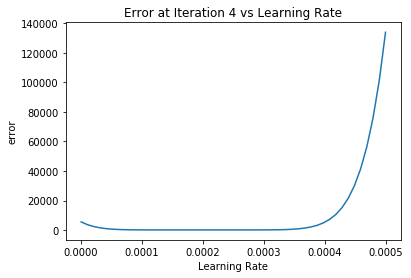

In [33]:
def plot_learning(num_iterations):
    learning_rates = np.linspace(0.0000001, 0.0005, 50)
    errors = []
    for rate in learning_rates:
        errors.append(run_error(num_iterations, learning_rate=rate))
    
    plt.plot(learning_rates, errors)
    plt.xlabel("Learning Rate")
    plt.ylabel("error")
    plt.title("Error at Iteration {0} vs Learning Rate".format(num_iterations))
    plt.show()
    
plot_learning(4)

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

Graph A: learning rate = 0.0001


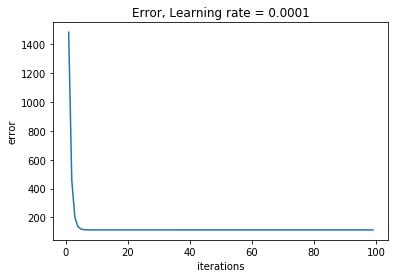

In [26]:
print("Graph A: learning rate = 0.0001")
plot_error(.0001)

Graph B: learning rate = 0.0004


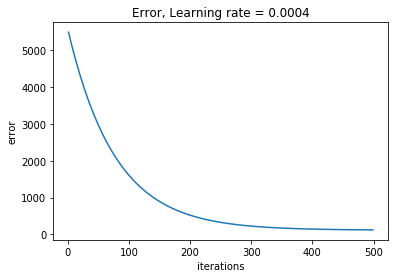

In [35]:
print("Graph B: learning rate = 0.0004")
plot_error(.0004, 500)

Graph C: learning rate = 0.0005


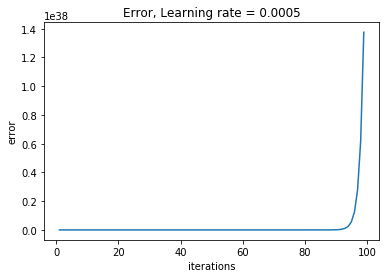

In [28]:
print("Graph C: learning rate = 0.0005")
plot_error(.0005)

Graph D: learning rate = 0.00001


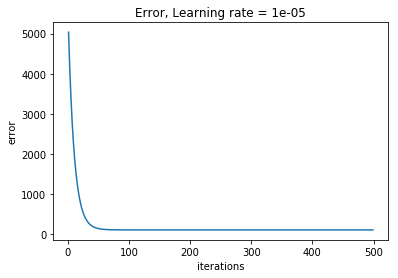

In [36]:
print("Graph D: learning rate = 0.00001")
plot_error(.00001, 500)

Graph E: learning rate = 0.00001


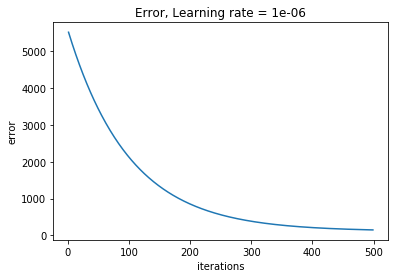

In [38]:
print("Graph E: learning rate = 0.000001")
plot_error(.000001, 500)

The graphs above illustrate convergence of gradient descent over 100 iterations while varying learning rate from the default given in Part 1 (learning rate = 0.0001). From graphs A, B, and C, we can see that when the learning rate is 0.0001, gradient descent converges and is stable within 10 iterations. In graph B, with a greater learning rate = 0.0004, it is not clear whether or not gradient descent converges within 100 iterations, but it does seem to converge within 500 iterations. In graph C, increasing the learning rate to 0.0005 causes error to explode at 100 iterations, meaning that gradient descent diverges. This coincides with what we saw in Part 1, where for learning rate = 0.0001, the error at 4 iterations is low, and at 0.0004, the error starts to increase,and at 0.0005, the error explodes. In graph D, we see a smaller learning rate 0.00001, for which we see convergence after about 50 iterations. Graph E shows an even smaller learning rate 0.000001, which looks similar to graph B, where it converges, but does so at a high number of iterations. Therefore, just as in part 1, we can infer that there is an optimal learning rate or range of learning rates.